### 문서내에서의 단어중요도등을 다루는 TF-IDF에 대한 process의 이해 
- 아래와 같이 작업하지 않아도 사이킷런에서 제공하는 TfidfVectorizer 모듈로 계산가능함

### Part1. DTM 작성 및 TF 확인
- 텍스트 분석 - DTM 알고리즘의 이해_문서내의 단어빈도수 계산 에서 DTM 제작이 된후 작업 연결임

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해(구글에서 math 라이브러리 검색)

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

print(vocab)

In [ ]:
# 문자별 단어 빈도수(DTM)
N=len(docs)
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(d.count(t))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

### Part2-1. TF-IDF 계산 (IDF 계산)
- 출처: https://wikidocs.net/31698

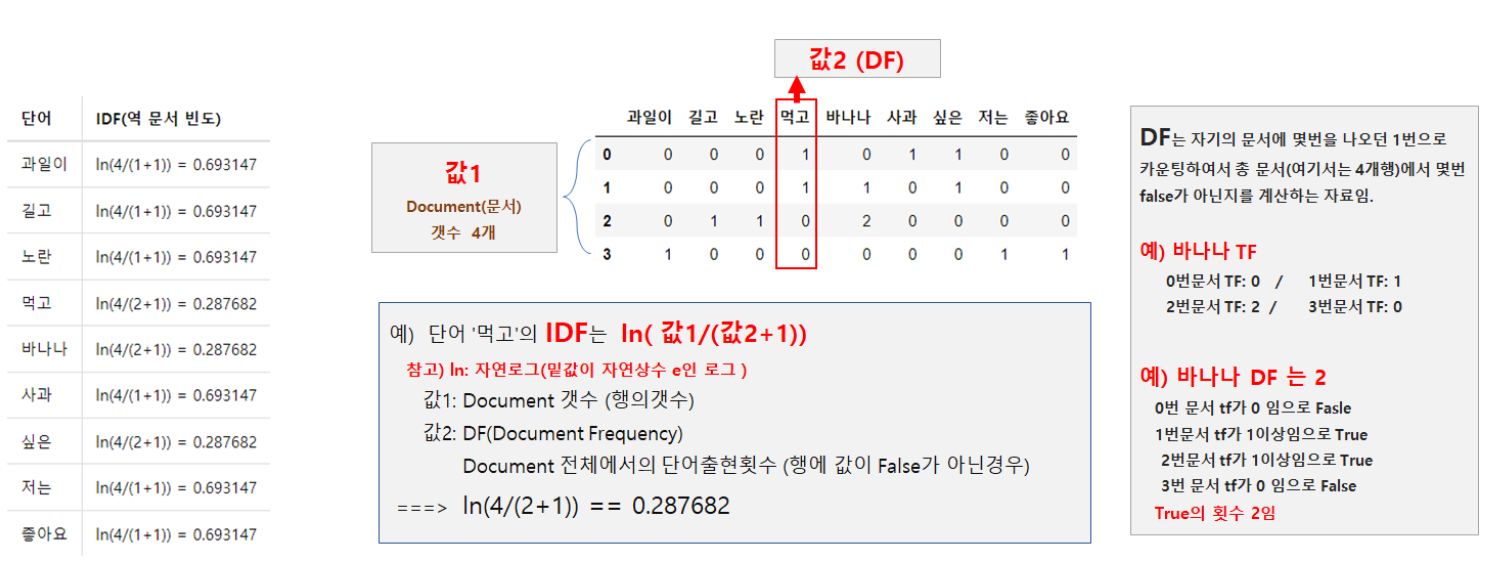

In [ ]:
# 역 빈도수 계산 함수
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

In [ ]:
# IDF 계산
result = []   # 단어의 문장 출현 빈도 정
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

### Part2-2. TF-IDF 계산
- 출처: https://wikidocs.net/31698

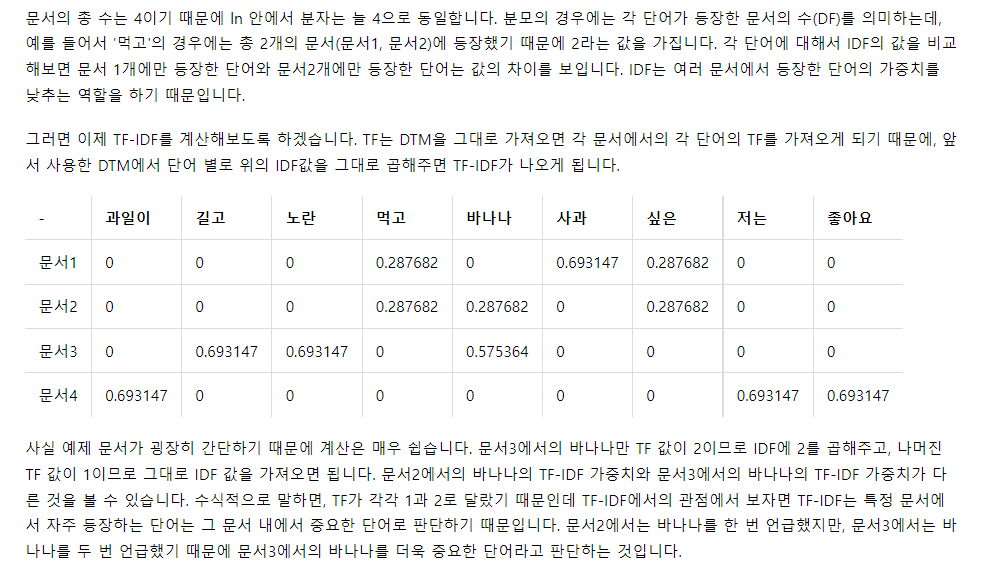

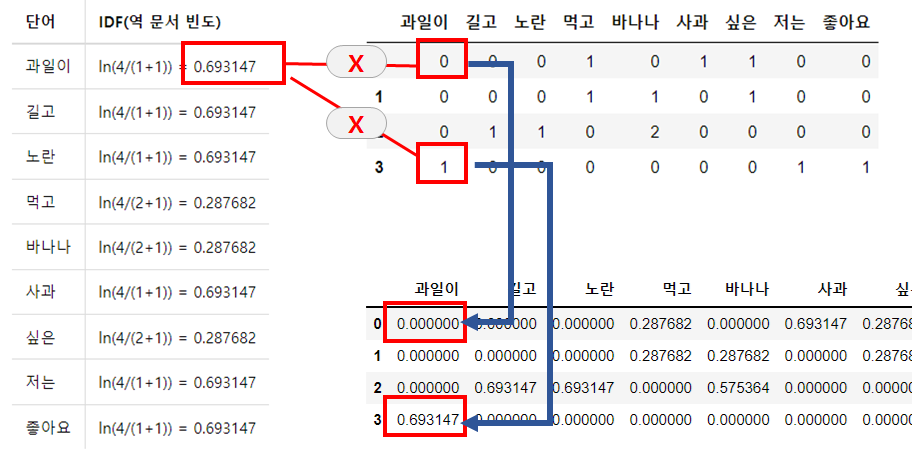

In [ ]:
def tfidf(t, d):
    return d.count(t) * idf(t)

In [ ]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

In [ ]:
과일이 = 0.693147
길고 = 0.693147
노란 = 0.693147
먹고 = 0.287682 + 0.287682
바나나 = 0.287682 + 0.575364


print(과일이)
print(먹고)
print(바나나)

출처: https://wikidocs.net/31698

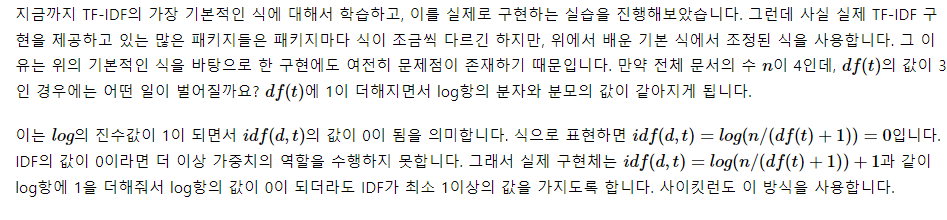

- 그림: Doc1에 가장 영향력이 있는 단어 => Term1
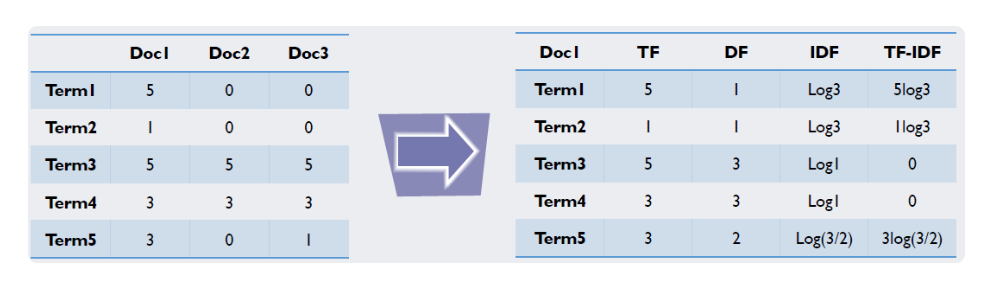

### Part3. 사이킷런 모듈을 이용한 TF-IDF 계산
- 출처: https://wikidocs.net/31698 의 3. 사이킷런을 이용한 DTM과 TF-IDF 실습 참조
- 사이킷런 계산식은 일반 TF-IDF와 조금 달라서 계산결과가 위의 계산식과 똑같지 않음.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'  
]

tv = TfidfVectorizer()
tv.fit(corpus)
#print(tv.transform(corpus))
print(tv.transform(corpus).toarray())

print(tv.vocabulary_)